In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df2 = pd.read_csv('food_coded.csv')
df2 = df2[['GPA', 'Gender' , 'calories_chicken', 'turkey_calories', 'income', 'employment', 'father_education', 'mother_education', 'grade_level', 'eating_out', 'on_off_campus', 'cook', 'exercise', 'drink','breakfast', 'parents_cook', 'pay_meal_out', 'nutritional_check']]

In [3]:
# making variable of the % correct. we could not find the other actual calorie counts of others
df2['calories_chicken_prop'] = df2['calories_chicken']/720
df2['calories_turkey_prop'] = df2['turkey_calories']/690

In [4]:
# Clean GPA 
df2['GPA'] = df2['GPA'].str[:3]
df2['GPA'].replace(['Per','Unk'], None, inplace=True)
df2['GPA'].value_counts()
df2['GPA'] = df2['GPA'].astype(float)

In [5]:
# Gender, calories_chicken, turkey_calories, income, employment, father_education, mother_education, on_off_campus, are clean 

## What type of students are more likely to eat out? 
Frequency of eating out vs:
- income
- job status (employed/not employed) 
- living situation (on-off campus) 
- parents cook
- grade 
- willingness to pay for a meal out 
- nutritional check
- exercising

In [6]:
corr_columns = df2[['GPA','income','employment','exercise', 'on_off_campus', 'parents_cook', 'grade_level', 'pay_meal_out','nutritional_check', 'eating_out']]
corr_columns.corr()['eating_out'].sort_values(ascending=False)

eating_out           1.000000
employment           0.170919
parents_cook         0.152110
grade_level          0.072972
on_off_campus        0.043086
income               0.001340
nutritional_check   -0.039017
GPA                 -0.047309
pay_meal_out        -0.085503
exercise            -0.095447
Name: eating_out, dtype: float64

Based off of these correlations, we would choose to investigate employment, parents_cook, grade_level, on_off_campus, and income. We will also investigate nutritional_check and pay_meal_out because we would assume that these factors would impact someone's willingness to and frequency of eating out.

In [7]:
def eatout_groupby_plot(variable, title, xlabel, xticks, labels, rot='horizontal'):
    d = df2.groupby([variable, 'eating_out']).count().unstack()['GPA']
    d.columns= ['Never', '1-2 times', '2-3 times', '3-5 times', 'Everyday' ]
    d.plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(xticks, labels, rotation = rot)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

In [8]:
def check_anova_assumptions(results, variable):
    #normality
    print("normality:",stats.shapiro(results.resid))
    
    # homogenity of var
    print("variance homogeneity:",stats.levene(df2['eating_out'][df2[variable] == 1],
             df2['eating_out'][df2[variable] == 2],
             df2['eating_out'][df2[variable] == 3],
             df2['eating_out'][df2[variable] == 4]))
    

#### Employment vs. Eating Out

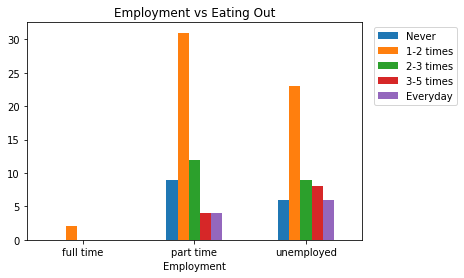

In [9]:
eatout_groupby_plot('employment', 'Employment vs Eating Out', 'Employment', [0,1,2], labels = ['full time', 'part time', 'unemployed'])

In [10]:
x = df2[['eating_out', 'employment']].dropna()

results = ols('eating_out ~ C(employment)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['employment'] == 1],
             x['eating_out'][x['employment']== 2],
             x['eating_out'][x['employment'] == 3]))

sm.stats.anova_lm(results)

normality: (0.916803777217865, 2.238413571831188e-06)
variance homogeneity: LeveneResult(statistic=1.97670035988227, pvalue=0.14328666498617645)


,df,sum_sq,mean_sq,F,PR(>F)
C(employment),2.0,4.230779,2.115390,1.700695,0.187196
Residual,113.0,140.553704,1.243838,NaN,NaN


#### Parents Cooking vs. Eating Out 

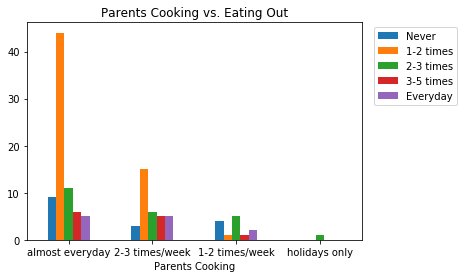

In [11]:
eatout_groupby_plot('parents_cook', 'Parents Cooking vs. Eating Out', 'Parents Cooking', [0,1,2,3], ['almost everyday', '2-3 times/week', '1-2 times/week', 'never'])

In [12]:
x = df2[['eating_out', 'parents_cook']].dropna()

results = ols('eating_out ~ C(parents_cook)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['parents_cook'] == 1],
             x['eating_out'][x['parents_cook']== 2],
             x['eating_out'][x['parents_cook'] == 3],
             x['eating_out'][x['parents_cook'] == 5]))

sm.stats.anova_lm(results)

normality: (0.9133484363555908, 6.50685933578643e-07)
variance homogeneity: LeveneResult(statistic=2.5821217533341407, pvalue=0.056558094937685925)


,df,sum_sq,mean_sq,F,PR(>F)
C(parents_cook),3.0,5.938547,1.979516,1.546682,0.205959
Residual,121.0,154.861453,1.279847,NaN,NaN


#### Grade vs. Eating_Out

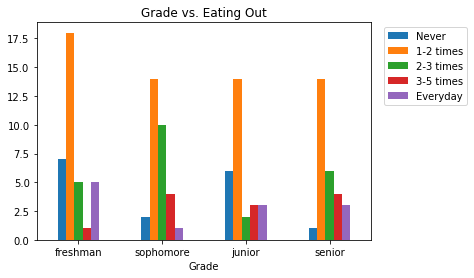

In [13]:
eatout_groupby_plot('grade_level', 'Grade vs. Eating Out', 'Grade', [0,1,2,3], ['freshman','sophomore', 'junior', 'senior' ])

In [14]:
results = ols('eating_out ~ C(grade_level)', data=df2).fit()

check_anova_assumptions(results,'grade_level')

sm.stats.anova_lm(results)

normality: (0.8931469917297363, 5.479141407249699e-08)
variance homogeneity: LeveneResult(statistic=0.07917511485286827, pvalue=0.9711869044260056)


,df,sum_sq,mean_sq,F,PR(>F)
C(grade_level),3.0,2.717954,0.905985,0.693464,0.557763
Residual,121.0,158.082046,1.306463,NaN,NaN


#### Living Situation vs. Eating Out

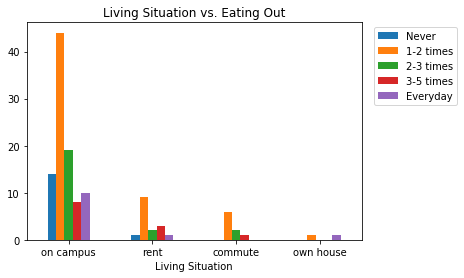

In [15]:
eatout_groupby_plot('on_off_campus', 'Living Situation vs. Eating Out', 'Living Situation', [0,1,2,3], ['on campus', 'rent', 'commute', 'own house'])

In [16]:
results = ols('eating_out ~ C(on_off_campus)', data=df2).fit()

check_anova_assumptions(results,'on_off_campus')

sm.stats.anova_lm(results)

normality: (0.865799605846405, 3.238321166776359e-09)
variance homogeneity: LeveneResult(statistic=0.8484733356980394, pvalue=0.4700299945410211)


,df,sum_sq,mean_sq,F,PR(>F)
C(on_off_campus),3.0,1.936408,0.645469,0.495212,0.686283
Residual,120.0,156.410367,1.303420,NaN,NaN


#### Income vs. Eating Out 

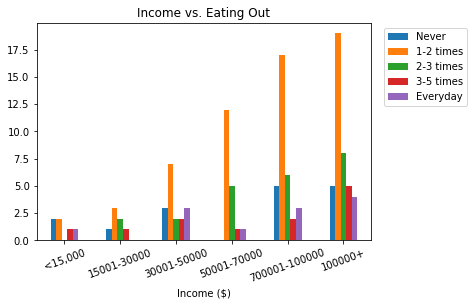

In [17]:
eatout_groupby_plot('income', 'Income vs. Eating Out', 'Income ($)', [0,1,2,3,4,5], ['<15,000', '15001-30000', '30001-50000','50001-70000','700001-100000', '100000+'], '20')

In [18]:
results = ols('eating_out ~ C(income)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['eating_out'][df2['income'] == 1],
             df2['eating_out'][df2['income'] == 2],
             df2['eating_out'][df2['income'] == 3],
             df2['eating_out'][df2['income'] == 4],
             df2['eating_out'][df2['income'] == 5],
             df2['eating_out'][df2['income'] == 6]))

sm.stats.anova_lm(results)

normality: (0.8873062133789062, 3.116862146157473e-08)
variance homogeneity: LeveneResult(statistic=0.6360125975379654, pvalue=0.6726308389940154)


,df,sum_sq,mean_sq,F,PR(>F)
C(income),5.0,1.244438,0.248888,0.184291,0.968051
Residual,118.0,159.360401,1.350512,NaN,NaN


#### Nutritional Fact Checking vs. Eating Out 

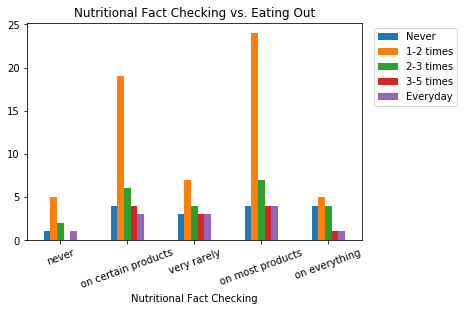

In [24]:
eatout_groupby_plot('nutritional_check', 'Nutritional Fact Checking vs. Eating Out', 'Nutritional Fact Checking', [0,1,2,3,4], ['never', 'on certain products', 'very rarely', 'on most products', 'on everything'], '20')

In [20]:
results = ols('eating_out ~ C(nutritional_check)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['eating_out'][df2['nutritional_check'] == 1],
             df2['eating_out'][df2['nutritional_check'] == 2],
             df2['eating_out'][df2['nutritional_check'] == 3],
             df2['eating_out'][df2['nutritional_check'] == 4],
             df2['eating_out'][df2['nutritional_check'] == 5]))

sm.stats.anova_lm(results)

normality: (0.8899130821228027, 3.786490765378403e-08)
variance homogeneity: LeveneResult(statistic=0.642244031711097, pvalue=0.6334053224285505)


,df,sum_sq,mean_sq,F,PR(>F)
C(nutritional_check),4.0,1.780103,0.445026,0.335827,0.853366
Residual,120.0,159.019897,1.325166,NaN,NaN


#### Willingness to Pay vs. Eating Out

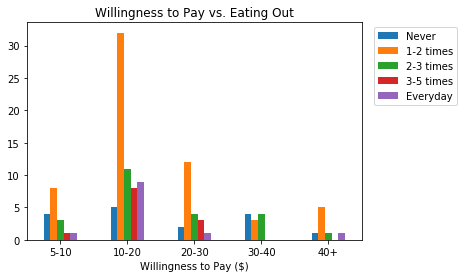

In [21]:
eatout_groupby_plot('pay_meal_out', 'Willingness to Pay vs. Eating Out', 'Willingness to Pay ($)', [0,1,2,3,4], ['5-10', '10-20', '20-30', '30-40', '40+'])

In [22]:
x = df2[['eating_out', 'pay_meal_out']].dropna()
results = ols('eating_out ~ C(pay_meal_out)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['pay_meal_out'] == 2],
             x['eating_out'][x['pay_meal_out'] == 3],
             x['eating_out'][x['pay_meal_out'] == 4],
             x['eating_out'][x['pay_meal_out'] == 5],
             x['eating_out'][x['pay_meal_out'] == 6],))

sm.stats.anova_lm(results)

normality: (0.9138274192810059, 6.926768492121482e-07)
variance homogeneity: LeveneResult(statistic=0.4649730891080192, pvalue=0.7613192818308849)


,df,sum_sq,mean_sq,F,PR(>F)
C(pay_meal_out),4.0,8.724385,2.181096,1.721062,0.149744
Residual,120.0,152.075615,1.267297,NaN,NaN
